# Encode & Decode for single block

takes a 16x16x3 matrix, corresponding to a Macroblock of the image

Outputs the result of the DCT transformation and Quantization

In [1]:
import numpy as np
import sys
import cv2
import scipy.fftpack as fft
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft

In [2]:
img_name = 'Add.png' 
#img_name = 'cameraman.png'
rgb = cv2.imread(img_name,1)[:16,:16]

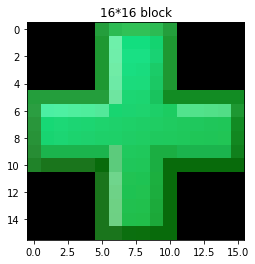

In [3]:
plt.title('16*16 block')
plt.imshow(rgb)

In [4]:
# Split bgr color channels
blue,green,red = cv2.split(rgb)
gray = cv2.cvtColor(rgb , cv2.COLOR_BGR2GRAY) # Convert color form BGR to Gray
"""
plt.figure(figsize=(15,5))
plt.subplot(151)
plt.title('rgb')
plt.imshow(rgb)
plt.subplot(152)
plt.title('red')
plt.imshow(red)
plt.subplot(153)
plt.title('green')
plt.imshow(green)
plt.subplot(154)
plt.title('blue')
plt.imshow(blue)
plt.subplot(155)
plt.title('gray')
plt.imshow(gray)
"""

"\nplt.figure(figsize=(15,5))\nplt.subplot(151)\nplt.title('rgb')\nplt.imshow(rgb)\nplt.subplot(152)\nplt.title('red')\nplt.imshow(red)\nplt.subplot(153)\nplt.title('green')\nplt.imshow(green)\nplt.subplot(154)\nplt.title('blue')\nplt.imshow(blue)\nplt.subplot(155)\nplt.title('gray')\nplt.imshow(gray)\n"

In [5]:
# Convert color form BGR to Y_Cr_Cb
YCrCb = cv2.cvtColor(rgb , cv2.COLOR_RGB2YCR_CB)
# Split Y_Cb_Cr channels
Y,Cb,Cr = cv2.split(YCrCb)

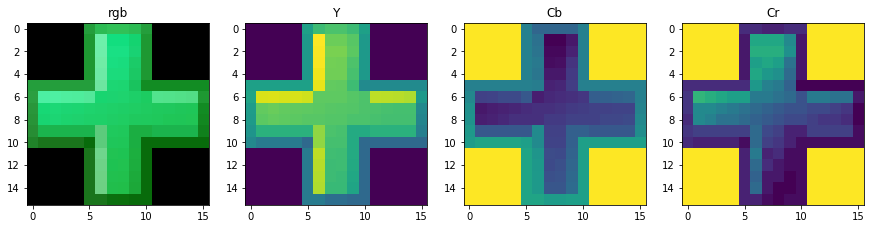

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title('rgb')
plt.imshow(rgb)
plt.subplot(142)
plt.title('Y')
plt.imshow(Y)
plt.subplot(143)
plt.title('Cb')
plt.imshow(Cb)
plt.subplot(144)
plt.title('Cr')
plt.imshow(Cr)

In [7]:
Y1 = Y[:8,:8]
Y2 = Y[:8,8:]
Y3 = Y[8:,:8]
Y4 = Y[8:,8:]

In [8]:
# The strategy of subsampling is to keep the top left pixel for each 2x2 block
# We can also compute the mean of 2x2 block, the let it be the summary of the small block
def subsample(src):
    tmp = []
    for i in range(0,len(src),2):
        #print(i)
        #print(Cb[i])
        #print(Cb[i][::2])
        tmp.append(src[i][::2])
        #print(tmp)
    tmp = np.array(tmp)
    return tmp

In [9]:
subsample_Cb = subsample(Cb)
subsample_Cr = subsample(Cr)

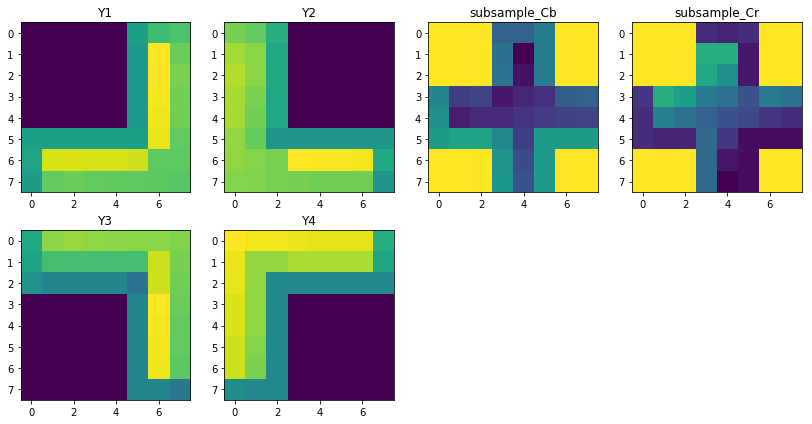

In [10]:
plt.figure(figsize=(14,7))
plt.subplot(241)
plt.title('Y1')
plt.imshow(Y1)
plt.subplot(242)
plt.title('Y2')
plt.imshow(Y2)
plt.subplot(243)
plt.title('subsample_Cb')
plt.imshow(subsample_Cb)
plt.subplot(244)
plt.title('subsample_Cr')
plt.imshow(subsample_Cr)
plt.subplot(245)
plt.title('Y3')
plt.imshow(Y3)
plt.subplot(246)
plt.title('Y4')
plt.imshow(Y4)

In [11]:
def dct(y):
    F = fft.dct(fft.dct(y, axis=0, norm='ortho', type=2), axis=1, norm='ortho', type=2)
    #F[0,0]=F[0,0]/64.
    return F
def idct(y):
    #F[0,0]=F[0,0]*64
    return fft.idct(fft.idct(y, axis=0, norm='ortho', type=2), axis=1, norm='ortho', type=2)

In [12]:
dct2_Y1 = dct(dct(Y1))
dct2_Y2 = dct(dct(Y2))
dct2_Y3 = dct(dct(Y3))
dct2_Y4 = dct(dct(Y4))
dct2_Cb = dct(dct(subsample_Cb))
dct2_Cr = dct(dct(subsample_Cr))

In [13]:
tmp = dct(Y1)
tmp

array([[  6.99750000e+02,  -3.35348737e+02,   1.31377086e+02,
         -3.04739953e+00,  -1.03500000e+02,   6.05659323e+01,
         -2.38405911e+01,  -1.39939598e+01],
       [ -3.09614405e+02,  -1.81399766e+02,   1.17724898e+02,
          2.79423371e+01,  -3.23646559e+01,   4.58216797e+01,
          1.23194052e+01,  -1.25649752e+01],
       [  1.21942966e+02,   1.00525874e+02,  -7.47517857e+01,
         -1.15207174e+01,   2.03337986e+01,  -4.54742780e+01,
          1.86776695e+01,  -1.25004193e+01],
       [  1.36344832e+01,   2.68849955e+01,  -4.87574365e+00,
          1.98814768e+00,   1.15333329e+01,  -3.00803214e+00,
          2.38709645e+00,   2.09535593e+00],
       [ -1.00000000e+02,  -4.12940145e+01,   2.44680428e+01,
          6.61863408e+00,  -4.25000000e+00,   8.76631883e-01,
          1.53012215e+01,  -1.15803525e+01],
       [  5.77053477e+01,   3.80026238e+01,  -3.87724844e+01,
         -4.19001266e+00,   3.73531361e+00,  -2.50746738e+01,
          1.20074492e+01,  -1.1

In [14]:
dct2_Y1

array([[  19.17051959,   41.60046972,   39.54419629,   56.4251145 ,
          58.32696897,  148.98443481,  121.42041951,   60.11153971],
       [  40.74158059,   67.63845546,   69.66895204,   86.10010557,
          98.0560807 ,  206.4387388 ,  225.97074101,   71.65161511],
       [  36.74241078,   66.38697012,   72.75111708,   86.16559972,
         100.16915509,  201.91814455,  233.94605132,   67.30634172],
       [  53.24471098,   84.86332272,   88.44192713,   94.31727802,
         101.2249272 ,  169.24853761,  193.54103872,   58.56502798],
       [  52.07666169,   93.3493124 ,   99.32236098,   98.80730642,
          98.38829582,  143.67098156,  147.46698687,   45.91937634],
       [ 140.04300641,  206.30154232,  207.51517923,  172.13749065,
         146.78083198,   63.10717785,   60.53612627,   20.22179206],
       [  97.65593012,  206.3646908 ,  222.92887633,  182.94758165,
         140.77753853,   60.98332835,  -29.20497881,    7.8213474 ],
       [  38.80919083,   65.16480731,   6

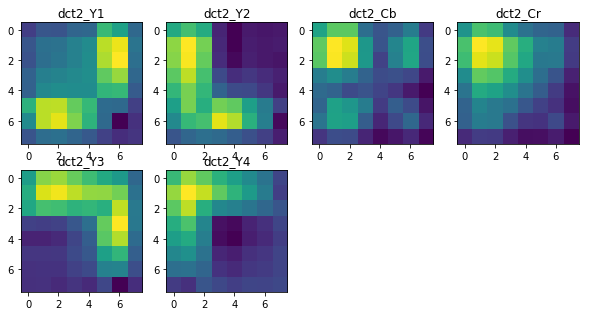

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(241)
plt.title('dct2_Y1')
plt.imshow(dct2_Y1)
plt.subplot(242)
plt.title('dct2_Y2')
plt.imshow(dct2_Y2)
plt.subplot(243)
plt.title('dct2_Cb')
plt.imshow(dct2_Cb)
plt.subplot(244)
plt.title('dct2_Cr')
plt.imshow(dct2_Cr)
plt.subplot(245)
plt.title('dct2_Y3')
plt.imshow(dct2_Y3)
plt.subplot(246)
plt.title('dct2_Y4')
plt.imshow(dct2_Y4)

In [16]:
# Define quantization matrix
# Source: https://en.wikipedia.org/wiki/MPEG-1#Quantization
quant_intra = np.matrix('16 11 10 16 24 40 51 61;12 12 14 19 26 58 60 55;14 13 16 24 40 57 69 56;14 17 22 29 51 87 80 62;18 22 37 56 68 109 103 77;24 35 55 64 81 104 113 92;49 64 78 87 103 121 120 101;72 92 95 98 112 100 103 99')
quant_intra

matrix([[ 16,  11,  10,  16,  24,  40,  51,  61],
        [ 12,  12,  14,  19,  26,  58,  60,  55],
        [ 14,  13,  16,  24,  40,  57,  69,  56],
        [ 14,  17,  22,  29,  51,  87,  80,  62],
        [ 18,  22,  37,  56,  68, 109, 103,  77],
        [ 24,  35,  55,  64,  81, 104, 113,  92],
        [ 49,  64,  78,  87, 103, 121, 120, 101],
        [ 72,  92,  95,  98, 112, 100, 103,  99]])

In [17]:
# Quantization function
def quantize(F,QF):
    quant_matrix=np.ceil(quant_intra*QF)
    #print(quant_matrix)
    quant_matrix[quant_matrix>255]=255
    #print(quant_matrix)
    return (F/quant_matrix).astype(np.int)

In [18]:
# manual way
def quantize1(F,QF):
    quant_matrix=np.ceil(quant_intra*QF)
    quant_matrix[quant_matrix>255]=255
    tmp = []
    for i in range(8):
        for j in range(8):
            #print(quant_matrix.A[i][j])
            tmp.append(int(round(F[i][j]/quant_matrix.A[i][j])))
    print(np.array(tmp).reshape(8,8))

In [50]:
QF = 0.3 ######## CHANGE THIS TO CONTROL QUALITY. Recommend [0.1, 2]#######
qtz_Y1 = quantize(dct2_Y1,QF) 
qtz_Y2 = quantize(dct2_Y2,QF) 
qtz_Y3 = quantize(dct2_Y3,QF) 
qtz_Y4 = quantize(dct2_Y4,QF) 
qtz_Cb = quantize(dct2_Cb,QF) 
qtz_Cr = quantize(dct2_Cr,QF) 

In [51]:
print(dct2_Y1)

[[  19.17051959   41.60046972   39.54419629   56.4251145    58.32696897
   148.98443481  121.42041951   60.11153971]
 [  40.74158059   67.63845546   69.66895204   86.10010557   98.0560807
   206.4387388   225.97074101   71.65161511]
 [  36.74241078   66.38697012   72.75111708   86.16559972  100.16915509
   201.91814455  233.94605132   67.30634172]
 [  53.24471098   84.86332272   88.44192713   94.31727802  101.2249272
   169.24853761  193.54103872   58.56502798]
 [  52.07666169   93.3493124    99.32236098   98.80730642   98.38829582
   143.67098156  147.46698687   45.91937634]
 [ 140.04300641  206.30154232  207.51517923  172.13749065  146.78083198
    63.10717785   60.53612627   20.22179206]
 [  97.65593012  206.3646908   222.92887633  182.94758165  140.77753853
    60.98332835  -29.20497881    7.8213474 ]
 [  38.80919083   65.16480731   67.70945654   56.81447158   44.63058105
    22.11189119    5.65450883   11.83213499]]


In [52]:
qtz_Cb

matrix([[25, 39, 52, 16,  8,  6,  5,  2],
        [39, 51, 39, 19,  8,  5,  7,  3],
        [31, 50, 38, 14,  4,  5,  6,  3],
        [19, 17, 13,  8,  3,  2,  2,  1],
        [13, 10,  4,  3,  2,  1,  0,  0],
        [ 9, 11,  6,  4,  1,  2,  1,  0],
        [ 5,  6,  5,  2,  1,  1,  2,  1],
        [ 2,  2,  2,  1,  0,  0,  1,  0]])

In [53]:
# takes a series of integers, returns the number of prefix 0s
def prefix_0(s):
    if len(s)==0:
        return 0
    i=0
    count = 0
    while s[i]==0 :
        count+=1
        #print(i,len(s)-1)
        if i==len(s)-1:
            return count
        i+=1
    return count

In [54]:
# This is an array of indices that we use to sample a flattened DCT array in zigzag order.
zz_indices = [ 0,  1,  8, 16,  9,  2,  3, 10,
               17, 24, 32, 25, 18, 11, 4,  5,
               12, 19, 26, 33, 40, 48, 41, 34,
               27, 20, 13,  6,  7, 14, 21, 28,
               35, 42, 49, 56, 57, 50, 43, 36,
               29, 22, 15, 23, 30, 37, 44, 51,
               58, 59, 52, 45, 38, 31, 39, 46,
               53, 60, 61, 54, 47, 55, 62, 63]

In [55]:
# convert the flattened list to the zigzaged order
zz_series = [qtz_Y1.A1[i] for i in zz_indices]
print(len(zz_series))
print(zz_series)

64
[3, 10, 10, 7, 16, 13, 11, 13, 16, 10, 8, 14, 14, 14, 7, 12, 12, 10, 12, 13, 17, 6, 18, 8, 10, 8, 11, 7, 3, 12, 11, 6, 5, 12, 10, 1, 2, 9, 8, 4, 6, 11, 4, 3, 8, 4, 5, 6, 2, 1, 4, 1, 4, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [56]:
# process the middle part -- <run, level>
# takes a list of numbers
# return a list of <run, level> pair
def run_level(tmp):
    encoded_string = []
    while True:
        #print(tmp)
        a = prefix_0(tmp)
        #print(a,len(tmp))
        if a==len(tmp):
            break
        #print([a,tmp[a]])
        encoded_string.append([a,tmp[a]])
        tmp = tmp[a+1:]
    return encoded_string

In [57]:
# takes a zigzag series of coeffs
# returns a list, in the form <DC term> <run, level> <EOB>
def encode(tmp):
    encoded_string = [tmp[0]]
    encoded_string += run_level(tmp[1:])
    encoded_string.append('EOB')
    return encoded_string

In [58]:
# takes a list, in the form <DC term> <run, level> <EOB>
# returns a zigzag series of coeffs
def decode(encoded_string):
    rst = [encoded_string[0]]
    for i in encoded_string[1:-1]:
        #print(i)
        for _ in range(i[0]):
            rst.append(0)
        rst.append(i[1])
    #print(16-len(rst))
    for i in range(64-len(rst)):
        rst.append(0)
    return rst

In [59]:
# a simple example of encoding and decoding
tmp = [1,2,0,0,1,0,0,0,2,0,3,0,0,0,0,0]
encoded = encode(tmp)
decoded = decode(encoded)
print(tmp)
print(encoded)
print(decoded) #decoded list has extra zeros because it only works for 8x8 blocks, but this example has less elements.

[1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0]
[1, [0, 2], [2, 1], [3, 2], [1, 3], 'EOB']
[1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [60]:
# encoding and decoding Y1
print(zz_series,len(zz_series),"\n")
encoded = encode(zz_series)
print(encoded,"\n")
decoded = decode(encoded)
print(decoded,len(decoded))

[3, 10, 10, 7, 16, 13, 11, 13, 16, 10, 8, 14, 14, 14, 7, 12, 12, 10, 12, 13, 17, 6, 18, 8, 10, 8, 11, 7, 3, 12, 11, 6, 5, 12, 10, 1, 2, 9, 8, 4, 6, 11, 4, 3, 8, 4, 5, 6, 2, 1, 4, 1, 4, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0] 64 

[3, [0, 10], [0, 10], [0, 7], [0, 16], [0, 13], [0, 11], [0, 13], [0, 16], [0, 10], [0, 8], [0, 14], [0, 14], [0, 14], [0, 7], [0, 12], [0, 12], [0, 10], [0, 12], [0, 13], [0, 17], [0, 6], [0, 18], [0, 8], [0, 10], [0, 8], [0, 11], [0, 7], [0, 3], [0, 12], [0, 11], [0, 6], [0, 5], [0, 12], [0, 10], [0, 1], [0, 2], [0, 9], [0, 8], [0, 4], [0, 6], [0, 11], [0, 4], [0, 3], [0, 8], [0, 4], [0, 5], [0, 6], [0, 2], [0, 1], [0, 4], [0, 1], [0, 4], [0, 3], [0, 1], [0, 1], [0, 1], [0, 1], 'EOB'] 

[3, 10, 10, 7, 16, 13, 11, 13, 16, 10, 8, 14, 14, 14, 7, 12, 12, 10, 12, 13, 17, 6, 18, 8, 10, 8, 11, 7, 3, 12, 11, 6, 5, 12, 10, 1, 2, 9, 8, 4, 6, 11, 4, 3, 8, 4, 5, 6, 2, 1, 4, 1, 4, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0] 64


In [61]:
reversed_zz_indices = [0, 1, 5, 6, 14,15,27,28,
                       2, 4, 7, 13,16,26,29,42,
                       3, 8, 12,17,25,30,41,43,
                       9, 11,18,24,31,40,44,53,
                       10,19,23,32,39,45,52,54,
                       20,22,33,38,46,51,55,60,
                       21,34,37,47,50,56,59,61,
                       35,36,48,49,57,58,62,63]

In [62]:
qtz_Y1

matrix([[ 3, 10, 13, 11,  7, 12,  7,  3],
        [10, 16, 13, 14, 12, 11, 12,  4],
        [ 7, 16, 14, 10,  8, 11, 11,  3],
        [10, 14, 12, 10,  6,  6,  8,  3],
        [ 8, 13,  8,  5,  4,  4,  4,  1],
        [17, 18, 12,  8,  5,  1,  1,  0],
        [ 6, 10,  9,  6,  4,  1,  0,  0],
        [ 1,  2,  2,  1,  1,  0,  0,  0]])

In [63]:
def de_flatten(F):
    return np.array([F[i] for i in reversed_zz_indices]).reshape(8,8)

In [64]:
de_flattened = de_flatten(decoded)
de_flattened

array([[ 3, 10, 13, 11,  7, 12,  7,  3],
       [10, 16, 13, 14, 12, 11, 12,  4],
       [ 7, 16, 14, 10,  8, 11, 11,  3],
       [10, 14, 12, 10,  6,  6,  8,  3],
       [ 8, 13,  8,  5,  4,  4,  4,  1],
       [17, 18, 12,  8,  5,  1,  1,  0],
       [ 6, 10,  9,  6,  4,  1,  0,  0],
       [ 1,  2,  2,  1,  1,  0,  0,  0]])

In [65]:
### doesn't correct. don't know why ###
def de_quantize(F):
    quant_matrix=np.ceil(quant_intra*QF)
    #print(quant_matrix)
    quant_matrix[quant_matrix>255]=255
    print(quant_matrix)
    print(F)
    return (F*quant_matrix).astype(np.int)

In [66]:
# manual way
def de_quantize1(F,QF):
    quant_matrix=np.ceil(quant_intra*QF)
    quant_matrix[quant_matrix>255]=255
    tmp = []
    for i in range(8):
        for j in range(8):
            #print(quant_matrix.A[i][j])
            tmp.append(int(F[i][j]*quant_matrix.A[i][j]))
    return np.array(tmp).reshape(8,8)

In [67]:
de_quantized = de_quantize1(de_flattened,QF)
de_quantized

array([[ 15,  40,  39,  55,  56, 144, 112,  57],
       [ 40,  64,  65,  84,  96, 198, 216,  68],
       [ 35,  64,  70,  80,  96, 198, 231,  51],
       [ 50,  84,  84,  90,  96, 162, 192,  57],
       [ 48,  91,  96,  85,  84, 132, 124,  24],
       [136, 198, 204, 160, 125,  32,  34,   0],
       [ 90, 200, 216, 162, 124,  37,   0,   0],
       [ 22,  56,  58,  30,  34,   0,   0,   0]])

In [68]:
### compared to original dct matrix ###
dct2_Y1.astype(int)

array([[ 19,  41,  39,  56,  58, 148, 121,  60],
       [ 40,  67,  69,  86,  98, 206, 225,  71],
       [ 36,  66,  72,  86, 100, 201, 233,  67],
       [ 53,  84,  88,  94, 101, 169, 193,  58],
       [ 52,  93,  99,  98,  98, 143, 147,  45],
       [140, 206, 207, 172, 146,  63,  60,  20],
       [ 97, 206, 222, 182, 140,  60, -29,   7],
       [ 38,  65,  67,  56,  44,  22,   5,  11]])

In [69]:
# the ultimate goal here is to regenerate the original picture

In [70]:
regenerated = idct(idct(de_quantized)).astype(int)
regenerated

array([[ -2,   0,   0,   2,   2, 109, 122, 135],
       [  1,  -2,  -1,   0,   2, 103, 189, 143],
       [ -1,   0,  -1,   0,   0, 106, 196, 146],
       [  0,   0,  -4,   0,   0, 104, 192, 157],
       [  0,   2,   1,  -4,   0, 110, 169, 123],
       [112, 108, 116, 112, 105,  99, 154, 114],
       [111, 182, 180, 172, 161, 151, 156, 129],
       [ 91, 148, 136, 123, 128, 106, 131, 105]])

In [71]:
### compared to original Y matrix ###
Y1

array([[  0,   0,   0,   0,   0, 110, 132, 138],
       [  0,   0,   0,   0,   0, 104, 193, 150],
       [  0,   0,   0,   0,   0, 104, 192, 154],
       [  0,   0,   0,   0,   0, 104, 191, 152],
       [  0,   0,   0,   0,   0, 104, 189, 151],
       [110, 110, 110, 110, 110, 110, 186, 147],
       [113, 182, 183, 181, 181, 179, 145, 145],
       [107, 147, 149, 147, 146, 145, 144, 143]], dtype=uint8)

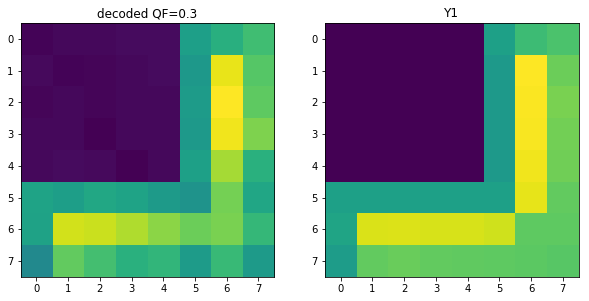

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('decoded QF={}'.format(QF))
plt.imshow(regenerated)
plt.subplot(122)
plt.title('Y1')
plt.imshow(Y1)

In [75]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))